In [2]:
# import required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
import nltk
import re
from nltk.corpus import stopwords
import string

In [3]:
# read the train and test dataset

train_df = pd.read_csv("./train_data.txt",engine='python', sep=':::', header=None,
                      names = ['id', 'title', 'genre', 'description'])
test_df = pd.read_csv("./test_data_solution.txt", engine='python', sep=':::', header=None,
                      names = ['id', 'title', 'genre', 'description'])

In [4]:
# Checking head of train dataset

train_df.head()

,id,title,genre,description
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [5]:
# Checking head of test dataset

test_df.head()

,id,title,genre,description
0,1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),drama,Before he was known internationally as a mart...


In [6]:
# Checking null values in train dataset

train_df.isnull().sum()

id             0
title          0
genre          0
description    0
dtype: int64

In [7]:
# Checking null values in test dataset

test_df.isnull().sum()

id             0
title          0
genre          0
description    0
dtype: int64

In [8]:
# Describe train dataset

train_df.describe()

,id
count,54214.000000
mean,27107.500000
std,15650.378084
min,1.000000
25%,13554.250000
50%,27107.500000
75%,40660.750000
max,54214.000000


In [9]:
# Checking the shape of train dataset

print("Shape of Train Dataset:", train_df.shape)

Shape of Train Dataset: (54214, 4)


In [10]:
# Checking the shape of train dataset

print("Shape of Test Dataset:", test_df.shape)

Shape of Test Dataset: (54200, 4)


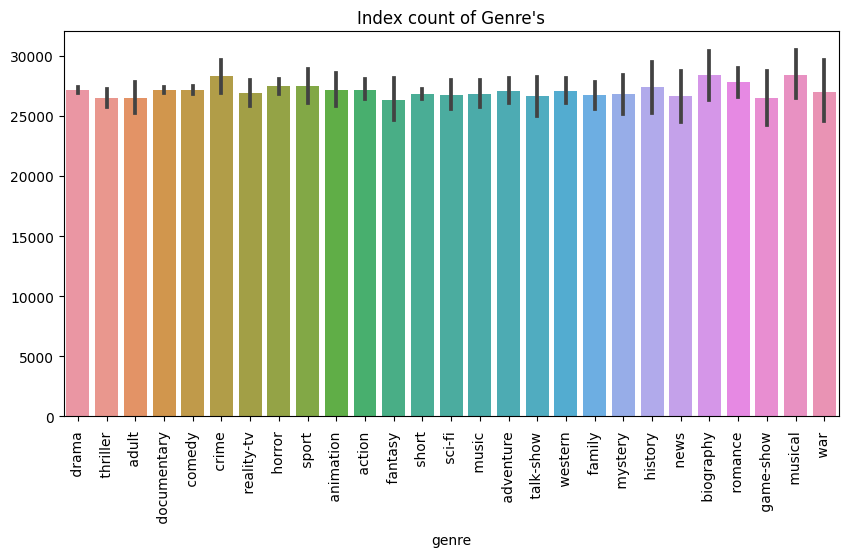

In [11]:
# Barplot for checking the Genres 

plt.figure(figsize=(10,5))
sns.barplot(x = train_df['genre'], y = train_df['genre'].index)
plt.xticks(rotation=90)

plt.title("Index count of Genre's")
plt.show()

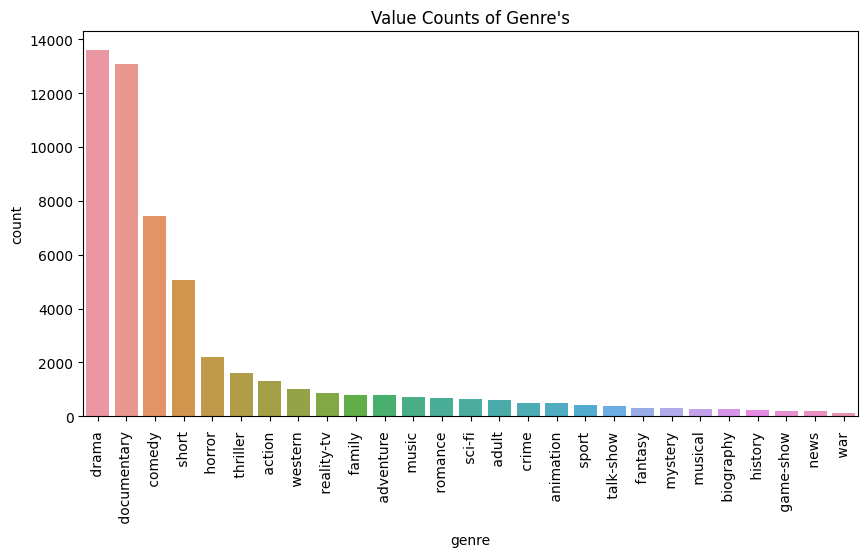

In [12]:
# Value Counts of Genre's

plt.figure(figsize=(10,5))

genre_df = train_df['genre'].value_counts()
sns.barplot(x=genre_df.index, y=genre_df)
plt.xticks(rotation=90)

plt.title("Value Counts of Genre's")
plt.show()

In [13]:
# Creating new column 'length' i.e., length of 'description' in both datasets 

train_df['length'] = train_df['description'].apply(len)
test_df['length'] = test_df['description'].apply(len)

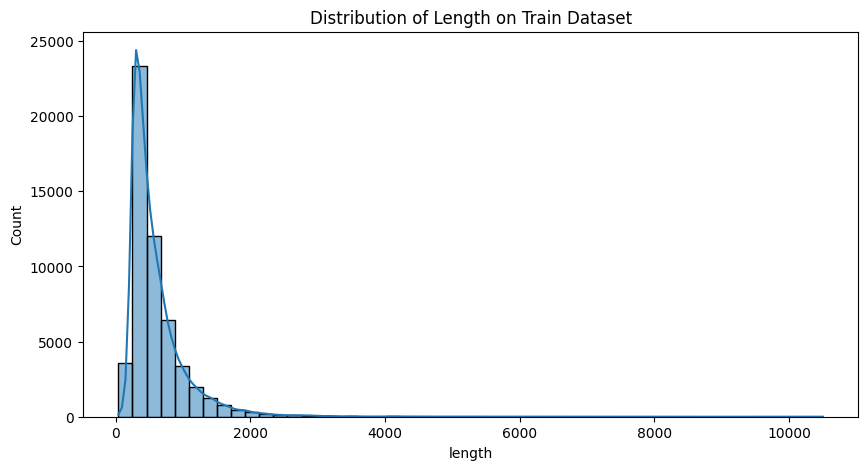

In [14]:
# Histplot of length of description

plt.figure(figsize=(10,5))
sns.histplot(x = train_df['length'], kde=True, bins=50)

plt.title("Distribution of Length on Train Dataset")
plt.show()

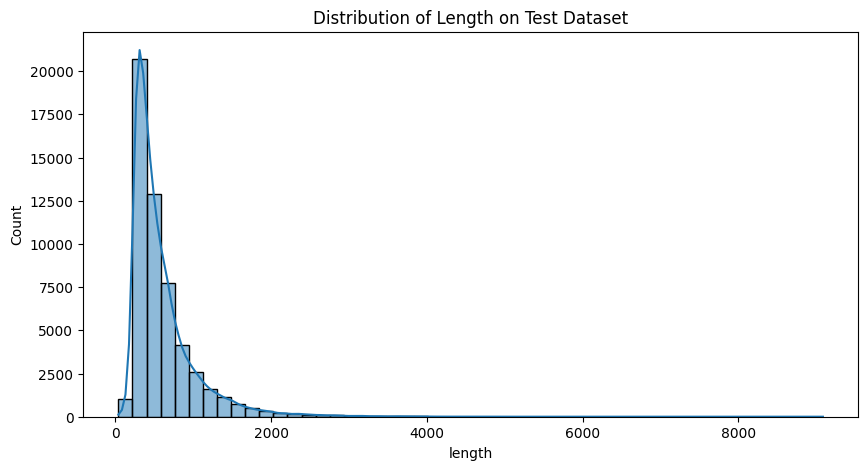

In [15]:
# Histplot of length of description on Test Dataset

plt.figure(figsize=(10,5))
sns.histplot(x = test_df['length'], kde=True, bins=50)

plt.title("Distribution of Length on Test Dataset")
plt.show()

In [16]:
#nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
stopword=set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
train_df["cleaned_description"] = train_df["description"].apply(clean)

In [17]:
# Creating a function to clean the data, which includes removing spaces, numbers, symbols, etc

stemmer = nltk.SnowballStemmer("english")
stopword = set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    #text = re.sub('!@#$%^&*()-_{}[]/\?*+<>`~', '', text)
    text = re.sub(r'[^\d\w\s]', '', text)
    text = re.sub('https:?\\S+ | www\.\S+', '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text = " ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text = " ".join(text)
    
    return(text)

In [18]:
# Cleaning the description using the above clean function 

train_df['cleaned_text'] = train_df['description'].apply(clean)
test_df['cleaned_text'] = test_df['description'].apply(clean)

In [19]:
# Creating new length column based on the cleaned description columns

train_df['cleaned_length'] = train_df['cleaned_text'].apply(len)
test_df['cleaned_length'] = test_df['cleaned_text'].apply(len)

In [20]:
# train_df after cleaning and adding new columns

train_df.head()

,id,title,genre,description,length,cleaned_description,cleaned_text,cleaned_length
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,546,listen convers doctor parent oscar learn nob...,listen convers doctor parent oscar learn nob...,332
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,184,brother sister past incestu relationship curr...,brother sister past incestu relationship curr...,112
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,650,bus empti student field trip museum natur his...,bus empti student field trip museum natur his...,348
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,1082,help unemploy father make end meet edith twin...,help unemploy father make end meet edith twin...,677
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,625,film titl refer unrecov bodi ground zero also...,film titl refer unrecov bodi ground zero also...,364


In [21]:
# test_df after cleaning and adding new columns

test_df.head()

,id,title,genre,description,length,cleaned_text,cleaned_length
0,1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apar...",510,lr brane love life car apart job especi girl...,285
1,2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty ch...",674,spain march quico naughti child three belong...,423
2,3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...,590,one year life albin famili shepherd north tra...,370
3,4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi...",681,father die hasnt spoken brother year serious...,383
4,5,Er nu zhai (1955),drama,Before he was known internationally as a mart...,814,known intern martial art superstar bruce lee ...,516


In [22]:
train_df['genre'] = train_df['genre'].astype('category')
train_df["genre_id"] = train_df['genre'].cat.codes

In [23]:
# using tfidfvectorizer

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
features = tfidf.fit_transform(train_df['genre']).toarray()
labels = train_df["genre_id"]
features.shape

(54214, 30)

In [25]:
# Creating X and y
# using Count Vectorizer on X
# splitting the data into train and test data

train_df = train_df[["cleaned_description", "genre"]]
x = np.array(train_df["cleaned_description"])
y = np.array(train_df["genre"])

cv = CountVectorizer()
X = cv.fit_transform(x)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
# Creating an instance of SGDClassifier
# fitting the model on training data

sgdmodel = SGDClassifier()
sgdmodel.fit(X_train,y_train)

SGDClassifier()

In [28]:
train_df['cleaned_description'].sample()

905     henri comput thing go henri usual hole apart ...
Name: cleaned_description, dtype: object

In [33]:
# Predicting the result on sample data

user = input("Enter a Text: ")
data = cv.transform([user]).toarray()
output = sgdmodel.predict(data)
print(output)

Enter a Text: The Shawshank Redemption is a 1994 American drama film written and directed by Frank Darabont, based on the 1982 Stephen King novella Rita Hayworth and Shawshank Redemption. It tells the story of Andy Dufresne (Tim Robbins), a banker who is sentenced to life in Shawshank State Penitentiary for the murders of his wife and her lover, despite his claims of innocence. Over the following two decades, he befriends a fellow inmate, Ellis "Red" Redding (Morgan Freeman), and becomes instrumental in a money-laundering operation led by the prison warden.
[' drama ']
